In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df = df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [16]:
from sklearn.cluster import KMeans
km = KMeans()

k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

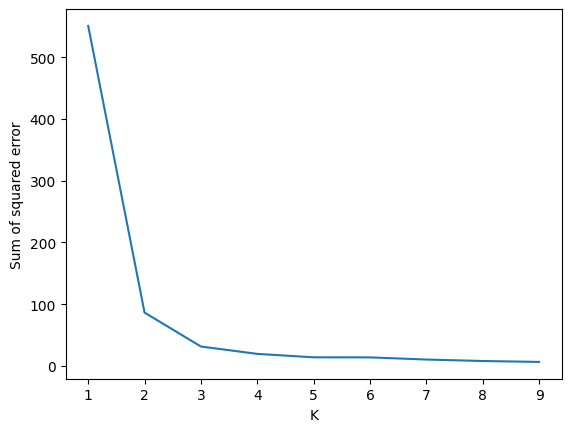

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [19]:
km.fit(df[['petal length (cm)', 'petal width (cm)']])

KMeans(n_clusters=3)

In [20]:
y_predicted = km.predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


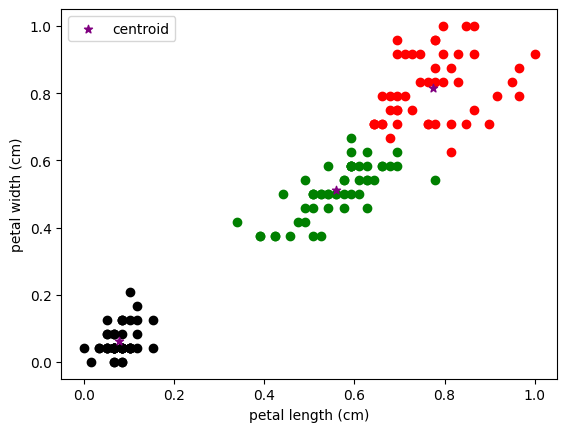

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

**LETS TRY BY USING MIN MAX SCALAR TO SEE IF ANY SIZEABLE CHANGES HAPPEN**

In [23]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [24]:
scalar.fit(df[['petal length (cm)']].values.reshape(-1, 1))
df['petal length (cm)'] = scalar.transform(df['petal length (cm)'].values.reshape(-1, 1))

In [25]:
scalar.fit(df[['petal width (cm)']].values.reshape(-1, 1))
df['petal width (cm)'] = scalar.transform(df['petal width (cm)'].values.reshape(-1, 1))

In [26]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


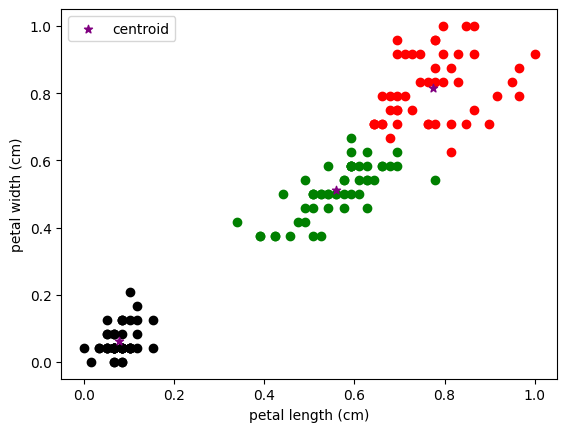

In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()